# Differentiable ZNE: Noisy circuits (100 points)

Whenever we simulate quantum circuits, we can do so under the most ideal circumstances, i.e. without needing to worry about noise. In practice, implementing, say, a Pauli  gate on today's hardware isn't as easy as writing qml.PauliZ; what ends up actually being implemented is an operation that's close to qml.PauliZ because, in some way, real-world noise is present.

There are many ways to combat noise, including a technique called zero-noise extrapolation (ZNE). We will work more with ZNE later! But, on the path towards fault-tolerant quantum computing, we must inevitably understand noise in order to combat it.

PennyLane offers the ability to simulate different types of noise that are present in quantum devices. One such type of noise is called a bitflip error. A bitflip error, occuring with a probability  on a given single qubit, is an error resulting in the state of a qubit being accidentally flipped. Check out this demo to learn more about modelling noise in PennyLane!

In this challenge, you'll implement a two-qubit circuit that contains bitflip errors on each of the qubits to see how the resulting quantum state drifts from that of the noise-less/error-free circuit. To do so, the fidelity between the respective states for various bitflip probabilities  will be calculated.

### Challenge code
The provided code below contains a few functions:

- `circuit`: A quantum circuit that contains a Hadamard and CNOT gate.

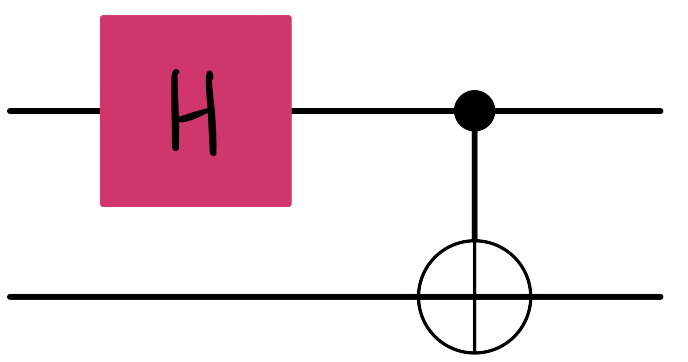

- `bitflip_circuit`: A quantum circuit that must be exactly like circuit, with the exception of bitflip errors on each qubit. You must complete this function.

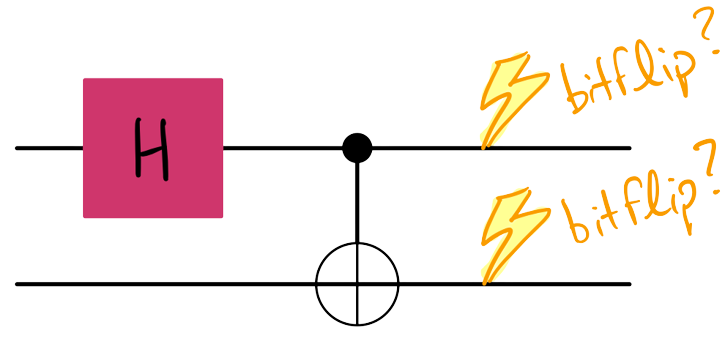

- `fidelities`: This function returns the quantum fidelity between the resulting states from the circuits mentioned above for various bitflip probabilities.

#### Input
As input to this problem, you are given a list of probabilities  `(list(float))` that define bitflip probabilities.

#### Output
This code will output the `fidelities (list(float))` between the error-free circuit's state and that of the circuits with bitflip errors given by the input probabilities.

If your solution matches the correct one within the given tolerance specified in `check` (in this case it's a `1e-4` relative error tolerance), the output will be `"Correct!"`. Otherwise, you will receive a `"Wrong answer"` prompt.

Good luck!

In [2]:
import functools
import json
import math
import pandas as pd
import pennylane as qml
import pennylane.numpy as np
import scipy

In [10]:
@qml.qnode(dev)
def bitflip_circuit(p):
    """A quantum circuit that contains two bitflip errors.
    It is the same circuit as the one above, but with bitflip errors.

    Args:
        p (float):
            The bitflip probability.

    Returns:
        qml.state():
            The quantum state.
    """
    # Put your code here #
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.BitFlip(p, wires=0)
    qml.BitFlip(p, wires=1)


    return qml.state()

In [3]:
dev = qml.device("default.mixed", wires=2)

@qml.qnode(dev)
def circuit():
    """An error-less quantum circuit.

    Returns:
        qml.state():
            The quantum state.
    """
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.state()

In [11]:
def fidelities(probs):
    fids = np.zeros(len(probs))
    for i, p in enumerate(probs):
        fid = qml.math.fidelity(bitflip_circuit(p), circuit())
        fids[i] = fid
    return np.round_(fids, decimals=5).tolist()

In [12]:
# These functions are responsible for testing the solution.

def run(test_case_input: str) -> str:
    probs = json.loads(test_case_input)
    fids = fidelities(probs)
    return str(fids)

def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(
        solution_output, expected_output, rtol=1e-4
    ), "Your circuit isn't quite right!"

In [13]:
test_cases = [['[0.05, 0.1, 0.15, 0.2, 0.25]', '[0.905, 0.82, 0.745, 0.68, 0.625]']]

In [14]:
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[0.05, 0.1, 0.15, 0.2, 0.25]'...
Correct!
